In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import scipy.stats as stats

In [2]:
#Import EPA data, read into dataframe
epa_source = "epa_data/annual_aqi_by_county_all.csv"
epa_data = pd.read_csv(epa_source, index_col=0)
epa_data.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2012,284,226,56,2,0,0,0,112,61,38,0,0,210,0,74,0
1,Alabama,Clay,2012,121,99,22,0,0,0,0,72,56,35,0,0,0,0,121,0
2,Alabama,Colbert,2012,283,222,55,6,0,0,0,136,62,40,0,0,209,0,74,0
3,Alabama,DeKalb,2012,361,282,74,5,0,0,0,115,64,40,0,0,320,0,41,0
4,Alabama,Elmore,2012,245,212,33,0,0,0,0,100,54,40,0,0,245,0,0,0


In [3]:
#Add a column for the common pollutant name, based on which of the days values had the largest number
epa_data['Common Pollutant'] = epa_data[['Days CO','Days NO2','Days Ozone','Days SO2','Days PM2.5','Days PM10']].idxmax(1).str.replace('Days ','')
epa_data.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Common Pollutant
0,Alabama,Baldwin,2012,284,226,56,2,0,0,0,112,61,38,0,0,210,0,74,0,Ozone
1,Alabama,Clay,2012,121,99,22,0,0,0,0,72,56,35,0,0,0,0,121,0,PM2.5
2,Alabama,Colbert,2012,283,222,55,6,0,0,0,136,62,40,0,0,209,0,74,0,Ozone
3,Alabama,DeKalb,2012,361,282,74,5,0,0,0,115,64,40,0,0,320,0,41,0,Ozone
4,Alabama,Elmore,2012,245,212,33,0,0,0,0,100,54,40,0,0,245,0,0,0,Ozone


In [12]:
#Listing the columns, just for info. Does not need to be retained in the final notebook
epa_data.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10',
       'Common Pollutant'],
      dtype='object')

In [4]:
#Add columns to the dataframe for percentages of types of days to give all rows a consistent frame of measure
epa_data['Pct Good Days'] = epa_data['Good Days'] / epa_data['Days with AQI']
epa_data['Pct Moderate Days'] = epa_data['Moderate Days'] / epa_data['Days with AQI'] 
epa_data['Pct Unhealthy for Sensitive Groups Days'] = epa_data['Unhealthy for Sensitive Groups Days'] / epa_data['Days with AQI'] 
epa_data['Pct Unhealthy Days'] = epa_data['Unhealthy Days'] / epa_data['Days with AQI'] 
epa_data['Pct Very Unhealthy Days'] = epa_data['Very Unhealthy Days'] / epa_data['Days with AQI'] 
epa_data['Pct Hazardous Days'] = epa_data['Hazardous Days'] / epa_data['Days with AQI'] 
epa_data.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days SO2,Days PM2.5,Days PM10,Common Pollutant,Pct Good Days,Pct Moderate Days,Pct Unhealthy for Sensitive Groups Days,Pct Unhealthy Days,Pct Very Unhealthy Days,Pct Hazardous Days
0,Alabama,Baldwin,2012,284,226,56,2,0,0,0,...,0,74,0,Ozone,0.795775,0.197183,0.007042,0.0,0.0,0.0
1,Alabama,Clay,2012,121,99,22,0,0,0,0,...,0,121,0,PM2.5,0.818182,0.181818,0.000000,0.0,0.0,0.0
2,Alabama,Colbert,2012,283,222,55,6,0,0,0,...,0,74,0,Ozone,0.784452,0.194346,0.021201,0.0,0.0,0.0
3,Alabama,DeKalb,2012,361,282,74,5,0,0,0,...,0,41,0,Ozone,0.781163,0.204986,0.013850,0.0,0.0,0.0
4,Alabama,Elmore,2012,245,212,33,0,0,0,0,...,0,0,0,Ozone,0.865306,0.134694,0.000000,0.0,0.0,0.0


In [5]:
#Export the munged EPA dataframe to a new CSV
epa_data.to_csv("epa_data/annual_aqi_by_county_all_munged.csv", sep=",", index=False, encoding='utf-8')

In [38]:
#Columns again, for reference. Does not need to be retained in final notebook
epa_data.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'Common Pollutant',
       'Pct Good Days', 'Pct Moderate Days',
       'Pct Unhealthy for Sensitive Groups Days', 'Pct Unhealthy Days',
       'Pct Very Unhealthy Days', 'Pct Hazardous Days'],
      dtype='object')

In [22]:
#Drop the rows containing data for Mexico and the Virgin Islands
epa_data = epa_data[epa_data["State"] != 'Country Of Mexico']
epa_data = epa_data[epa_data["State"] != 'Virgin Islands']

In [61]:
#Create a summary dataframe for year and common pollutant, counting the number of counties per year/pollutant
pollution_type_count = pd.DataFrame(epa_data.groupby(['Year','Common Pollutant'])['County'].count())
#Reset the index after the group by
pollution_type_count.reset_index(inplace = True)
#Pivot the dataframe, with year as the index and pollutants as the columns
pollution_type_count_pivot = pollution_type_count.pivot(index='Year', columns='Common Pollutant', values='County')
#Sort the pollutant types columns
pollution_type_count_pivot = pollution_type_count_pivot[['Ozone', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO']]
#display the pivot
pollution_type_count_pivot

Common Pollutant,Ozone,PM2.5,PM10,SO2,NO2,CO
Year,,,,,,
2012,609,363,52,34,6,3
2013,583,392,49,29,3,2
2014,585,389,42,28,4,2
2015,595,390,39,30,3,1
2016,655,318,39,32,6,1
2017,660,312,34,44,6,1


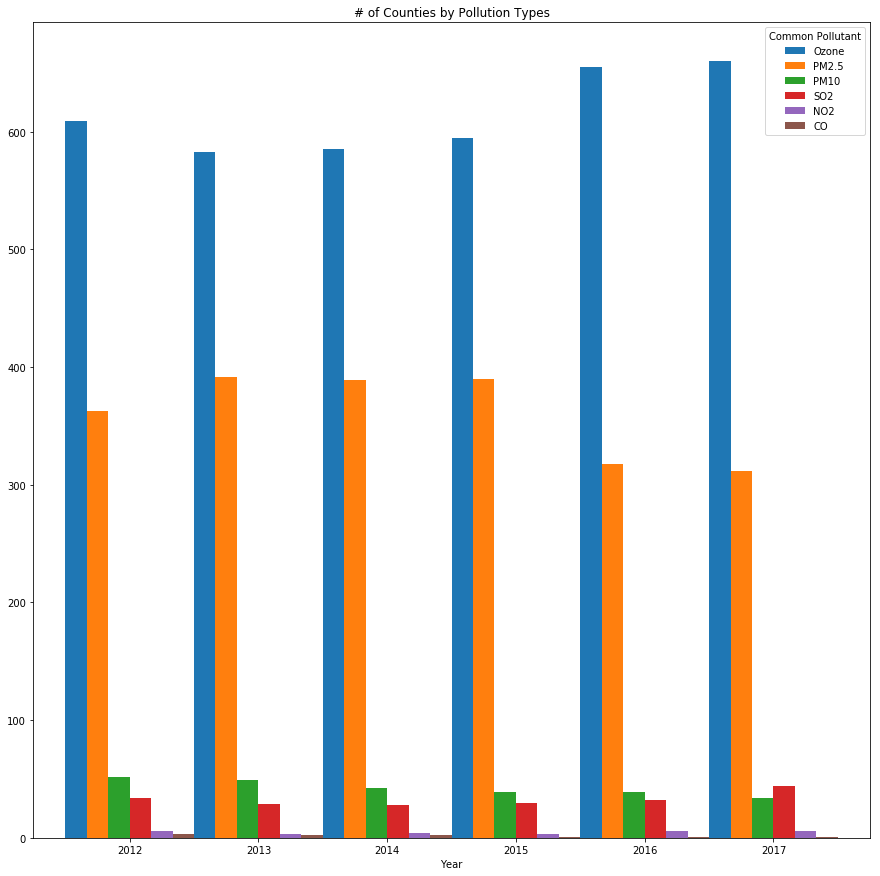

In [64]:
pollution_type_count_pivot.sort_values(by=['Year'], ascending=True).plot(kind='bar',width=1,stacked=False,figsize=(15,15),rot=0,title="# of Counties by Pollution Types")


In [10]:
epa_data_state_aqi_mean = pd.DataFrame(epa_data.groupby(['State','Year'])['Median AQI'].mean())
epa_data_state_aqi_mean.reset_index(inplace = True)
epa_data_state_aqi_mean_pivot = epa_data_state_aqi_mean.pivot(index='Year', columns='State', values='Median AQI')

epa_data_state_aqi_sem = pd.DataFrame(epa_data.groupby(['State','Year'])['Median AQI'].sem())
epa_data_state_aqi_sem.reset_index(inplace = True)
epa_data_state_aqi_sem_pivot = epa_data_state_aqi_sem.pivot(index='Year', columns='State', values='Median AQI')

epa_data_state_aqi_sem_pivot


State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Country Of Mexico,Delaware,District Of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2012,1.237393,4.607593,5.664346,2.780356,2.259947,3.101151,1.438470,2.5,2.848001,NaN,...,2.589455,1.082345,2.570652,6.115213,8.0,1.847204,1.465445,1.475084,2.120184,3.888489
2013,1.152576,4.678742,5.059410,3.407090,2.291265,2.786867,1.669046,4.5,1.527525,NaN,...,1.329160,1.136933,2.822472,6.169481,10.5,1.588560,1.571440,1.406786,2.009019,3.080145
2014,1.141178,5.653697,5.144270,3.093315,2.430827,2.514601,1.432250,17.0,2.185813,NaN,...,1.308071,1.079271,2.546333,5.552777,12.0,1.843349,1.480638,1.868197,1.427285,3.088267
2015,1.390914,5.977450,5.318736,3.049184,2.435975,2.613381,1.523624,NaN,2.185813,NaN,...,1.341461,1.083254,2.845374,5.552777,13.5,1.721023,1.600546,1.567123,1.363793,3.003486
2016,1.519242,4.733008,5.308900,3.169065,2.095837,2.640961,1.485044,NaN,1.452966,NaN,...,1.895520,1.759297,3.630987,6.337718,6.0,1.761889,1.478370,1.447268,1.377459,2.608189
2017,1.828971,4.725816,5.657029,1.563531,2.079805,2.820485,1.084592,13.0,1.452966,NaN,...,1.367760,1.884107,2.814029,6.087898,0.5,2.129561,1.661244,3.180630,1.430075,2.896648


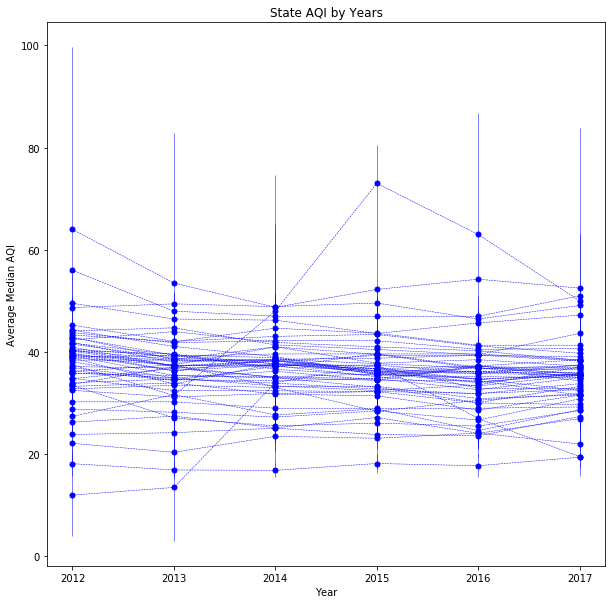

In [11]:
#Tried setting up an errorbar plot, but didn't come out as expected. OK to drop from final notebook

state_list = epa_data_state_aqi_mean_pivot.columns.values.tolist()
# Generate the Plot (with Error Bars)

plt.figure(figsize=(10,10))
#Loop through the list of drugs, building a plot for each. Reference the color and marker lists to differentiate the plots
i = 0
for s in state_list:
    plt.errorbar(epa_data_state_aqi_mean_pivot.index, epa_data_state_aqi_mean_pivot[s], yerr= epa_data_state_aqi_sem_pivot[s],color='b', 
             marker='o', markersize=5, linestyle='--', linewidth=0.5)
    
#Set labels and visual format
plt.xlabel("Year")
plt.ylabel("Average Median AQI")
plt.title("State AQI by Years")
#plt.grid()
#plt.legend()

#Show the plot in this notebook
plt.show()

In [25]:
#Create a dataframe organized by state and the average percentages of each of the AQI levels
epa_data_state_pcts = epa_data.groupby(['State'])['Pct Good Days', 'Pct Moderate Days',
       'Pct Unhealthy for Sensitive Groups Days', 'Pct Unhealthy Days',
       'Pct Very Unhealthy Days', 'Pct Hazardous Days'].mean()
#Print the dataframe
epa_data_state_pcts.head()

,Pct Good Days,Pct Moderate Days,Pct Unhealthy for Sensitive Groups Days,Pct Unhealthy Days,Pct Very Unhealthy Days,Pct Hazardous Days
State,,,,,,
Alabama,0.810722,0.184763,0.004152,0.000336,0.000027,0.000000
Alaska,0.869871,0.106059,0.012237,0.011416,0.000417,0.000000
Arizona,0.620954,0.315888,0.053046,0.008111,0.000807,0.000421
Arkansas,0.815497,0.181635,0.002591,0.000277,0.000000,0.000000
California,0.582489,0.332083,0.066943,0.016144,0.001303,0.000378


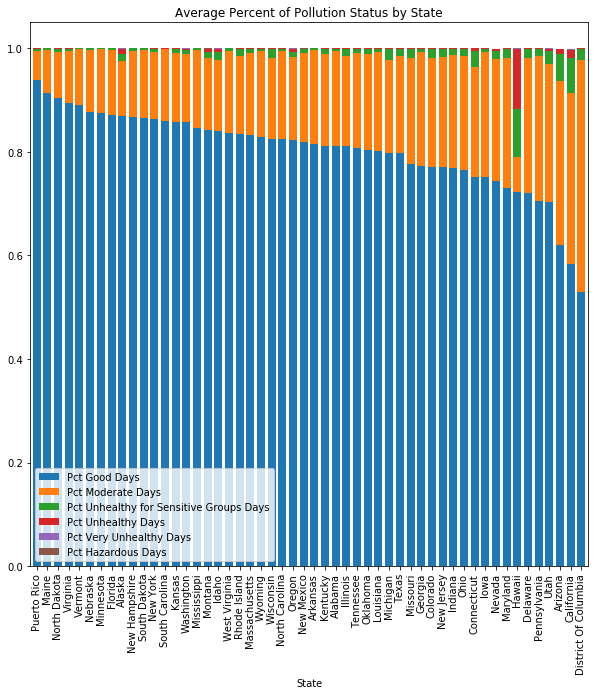

In [38]:
#Plot the dataframe as stacked bar chart
epa_data_state_pcts.sort_values(by='Pct Good Days', ascending=False).plot(kind='bar',stacked=True,width=.75,figsize=(10,10),rot=90,title="Average Percent of Pollution Status by State")


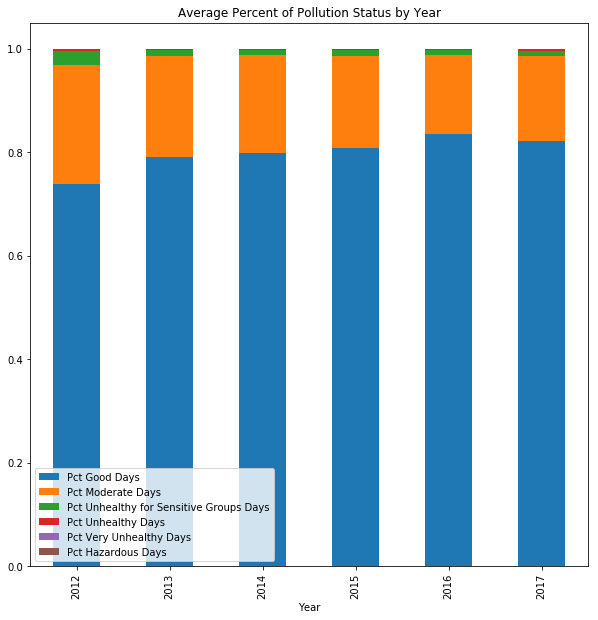

In [27]:
#Create a dataframe organized by Year and the average percentages of each of the AQI levels
epa_data_year_pcts = epa_data.groupby(['Year'])['Pct Good Days', 'Pct Moderate Days',
       'Pct Unhealthy for Sensitive Groups Days', 'Pct Unhealthy Days',
       'Pct Very Unhealthy Days', 'Pct Hazardous Days'].mean()
#Plot the dataframe as stacked bar chart
epa_data_year_pcts.sort_values(by='Year', ascending=True).plot(kind='bar',stacked=True,figsize=(10,10),rot=90,title="Average Percent of Pollution Status by Year")

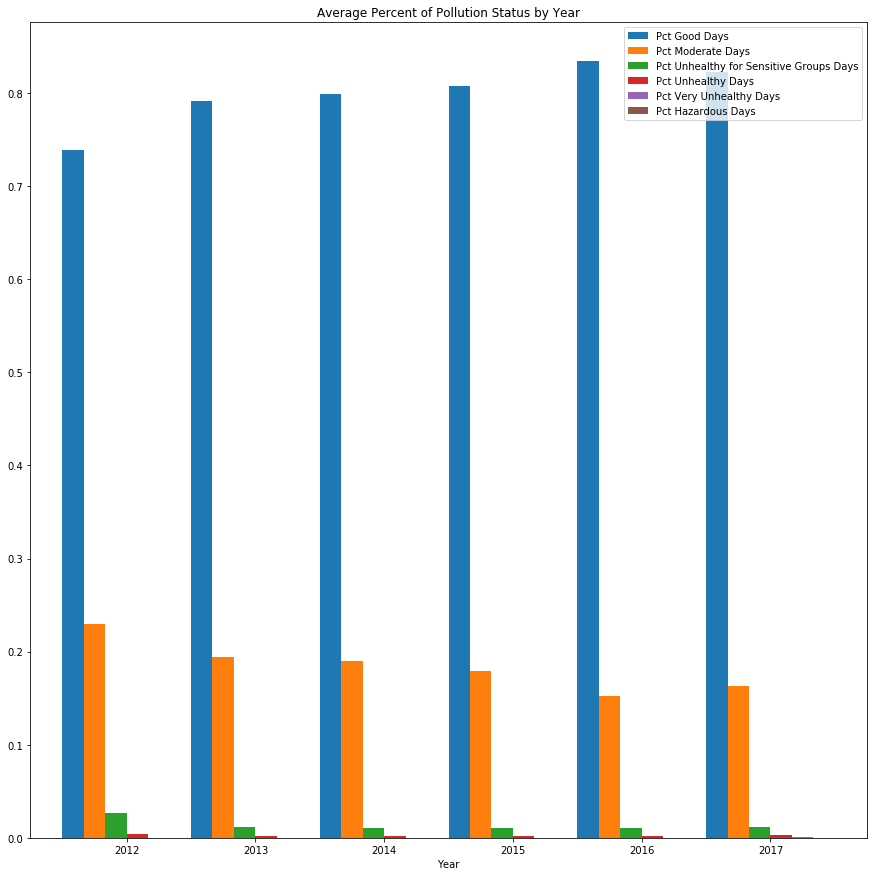

In [65]:
#Plot the dataframe as a bar chart
epa_data_year_pcts.sort_values(by='Year', ascending=True).plot(kind='bar',stacked=False,width=1,figsize=(15,15),rot=0,title="Average Percent of Pollution Status by Year")